## Sub plots :-
- In Matplotlib, you can create multiple plots in a single figure using the subplot function. This function allows you to divide the figure into a grid and specify which subplot you want to create

In [1]:
import matplotlib.pyplot as plt
import numpy as np, pandas as pd, seaborn as sns, sklearn
import warnings 
warnings.filterwarnings('ignore')


In [2]:
import matplotlib.gridspec as gridspec


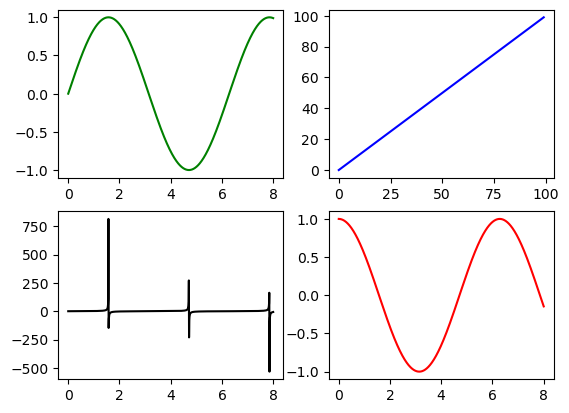

In [3]:
fig, ax = plt.subplots(2, 2)
x = np.linspace(0, 8, 1000)

ax[0, 0].plot(x, np.sin(x), 'g') #row=0, col=0
ax[1, 0].plot(x, np.tan(x), 'k') #row=1, col=0
ax[0, 1].plot(range(100), 'b') #row=0, col=1
ax[1, 1].plot(x, np.cos(x), 'r') #row=1, col=1
fig.show()

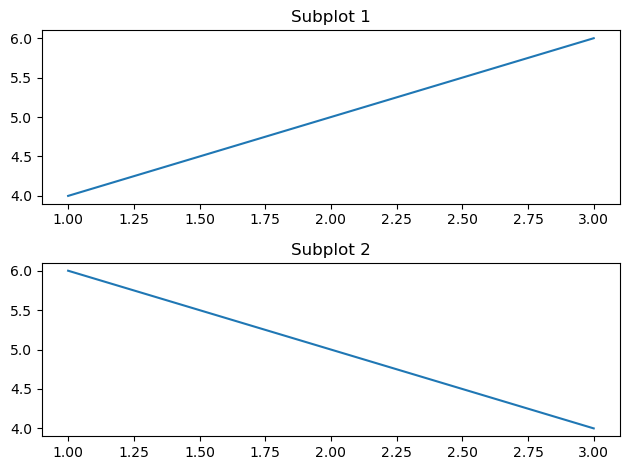

In [4]:


# Create subplot with 2 rows and 1 column, and select the first subplot
plt.subplot(2, 1, 1)
plt.plot([1, 2, 3], [4, 5, 6])
plt.title('Subplot 1')

# Create subplot with 2 rows and 1 column, and select the second subplot
plt.subplot(2, 1, 2)
plt.plot([1, 2, 3], [6, 5, 4])
plt.title('Subplot 2')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


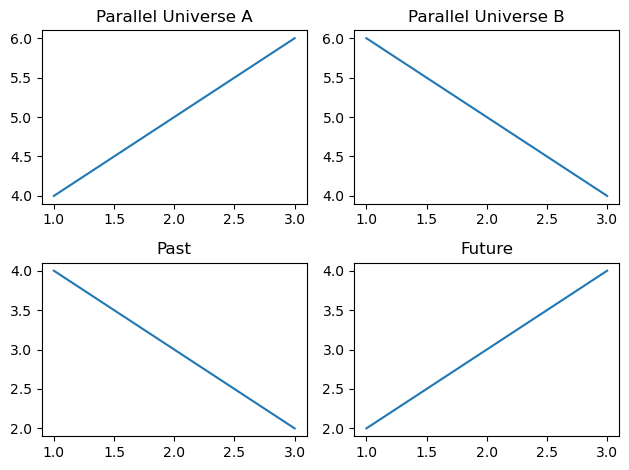

In [5]:


# Example 1: Parallel Universes
plt.subplot(2, 2, 1)
plt.plot([1, 2, 3], [4, 5, 6])
plt.title('Parallel Universe A')

plt.subplot(2, 2, 2)
plt.plot([1, 2, 3], [6, 5, 4])
plt.title('Parallel Universe B')

# Example 2: Time Travel Shenanigans
plt.subplot(2, 2, 3)
plt.plot([1, 2, 3], [4, 3, 2])
plt.title('Past')

plt.subplot(2, 2, 4)
plt.plot([1, 2, 3], [2, 3, 4])
plt.title('Future')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


### uses of subplots:-
- Comparison of Data: When you want to compare different datasets or variations of a dataset, you can create subplots to display them simultaneously. This makes it easy to visually compare trends, patterns, or relationships.

- Multiple Views of the Same Data: You may want to show different views or representations of the same data in a single figure. For example, a line chart and a bar chart for the same dataset can be placed in different subplots.

- Complex Visualizations:For complex visualizations, it's often beneficial to break down the information into smaller, more digestible parts. Subplots allow you to create a modular and organized layout for complex visualizations.

- Faceted Plots: Subplots are commonly used for faceted plots, where the data is divided into subsets based on one or more categorical variables. Each subplot represents a different category or subset of the data.

- Time-Series Analysis: When working with time-series data, you might want to show different aspects of the data, such as trends, seasonality, and residuals, in separate subplots for a more comprehensive analysis.

- Grid of Plots for Exploration:During the exploratory data analysis phase, subplots provide a convenient way to quickly generate multiple plots and explore different aspects of the data.

In [6]:
tips = sns.load_dataset('tips')

In [7]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [8]:
tdf = sns.load_dataset('titanic')

In [9]:
df =tips.copy()

In [10]:
iris = sns.load_dataset('iris')

In [11]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [12]:
df.columns


Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

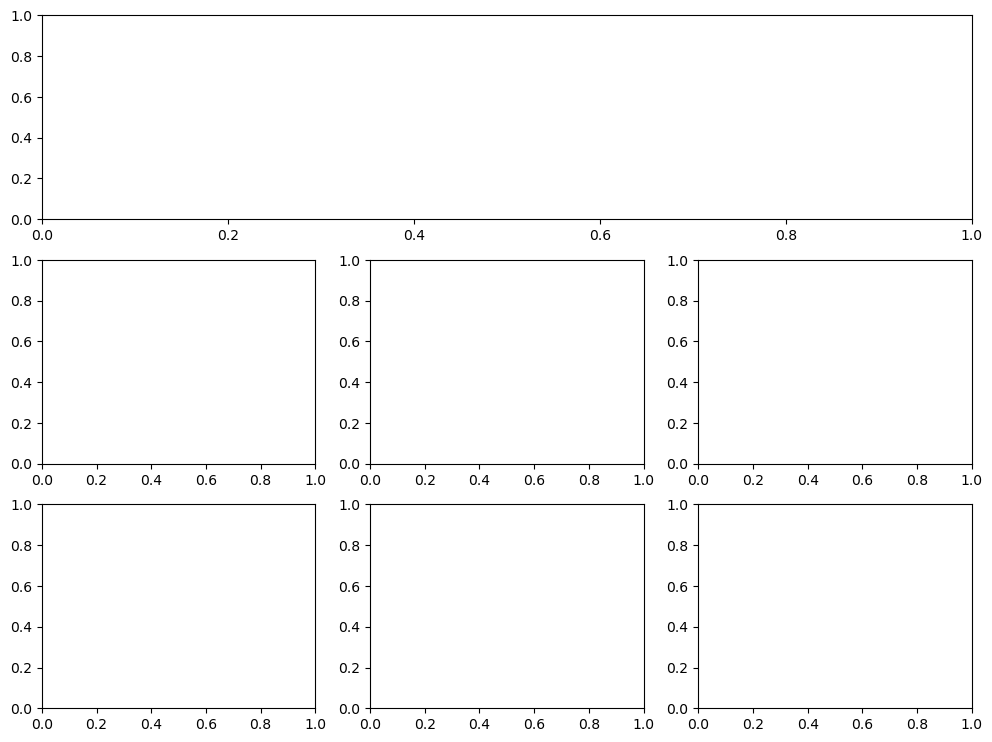

In [13]:
fig, axes = plt.subplots(3,3, figsize=(12,9))
G = gridspec.GridSpec(3,3)
ax = plt.subplot(G[0, :])



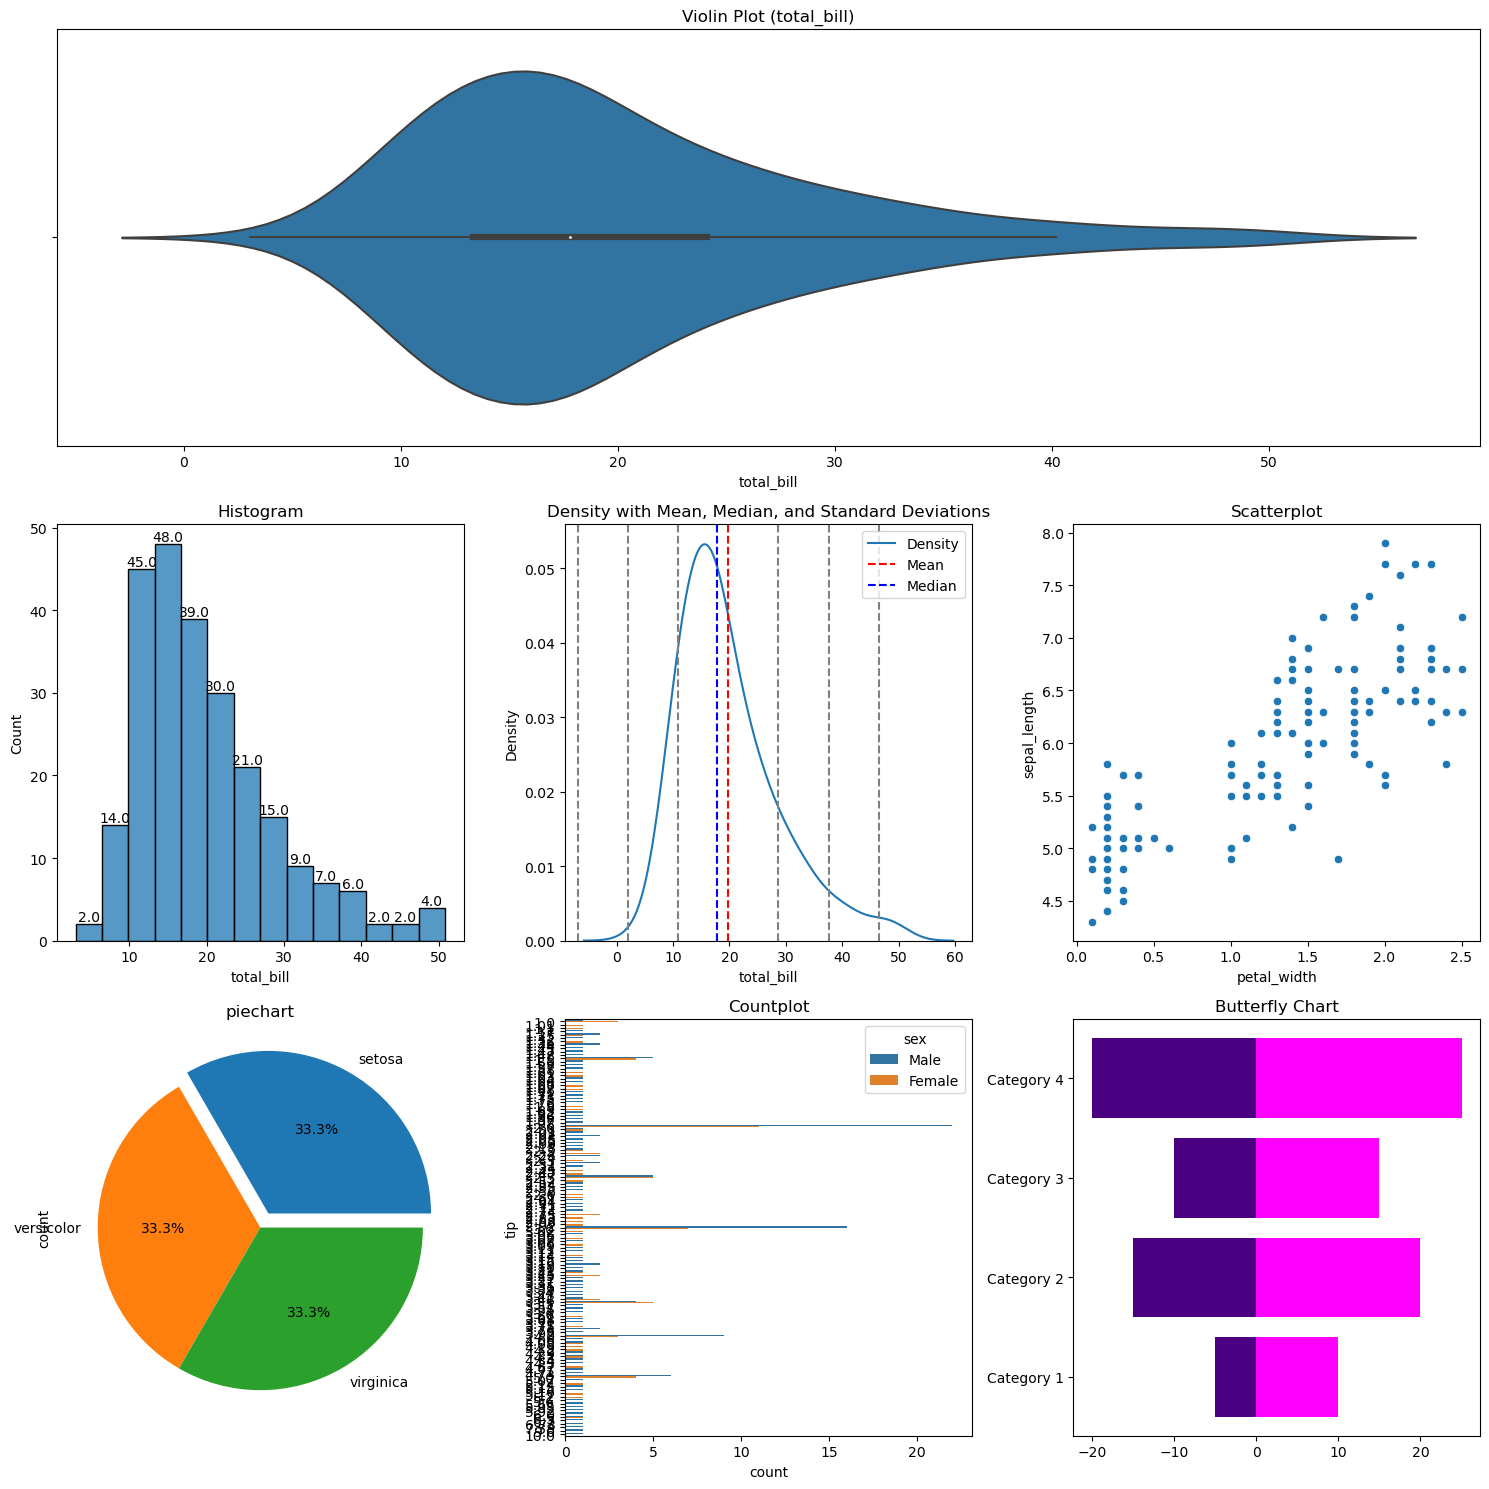

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
G = gridspec.GridSpec(3, 3)
axes_violin = plt.subplot(G[0, :])
sns.violinplot(x=tips['total_bill'], ax=axes_violin, orient='h')
axes_violin.set_title('Violin Plot (total_bill)')

b = plt.subplot(G[1, 0])
sns.histplot(tips['total_bill'], kde=False, ax=b)
b.set_title('Histogram')
hist_data, bin_edges, _ = b.hist(tips['total_bill'], bins='auto', alpha=0)  # Get histogram data without plotting
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

for count, x in zip(hist_data, bin_centers):
    b.text(x, count, str(count), ha='center', va='bottom')


c = plt.subplot(G[1, 1])
sns.kdeplot(tips['total_bill'], ax=c, label='Density')

mean_val = tips['total_bill'].mean()
median_val = tips['total_bill'].median()
std_dev = tips['total_bill'].std()

line_values = [mean_val, median_val] + [mean_val + i * std_dev for i in range(1, 4)] + [mean_val - i * std_dev for i in range(1, 4)]

plt.axvline(line_values[0], color='red', linestyle='--', label='Mean')
plt.axvline(line_values[1], color='blue', linestyle='--', label='Median')

for val in line_values[2:]:
    plt.axvline(val, color='gray', linestyle='--')

c.set_title('Density with Mean, Median, and Standard Deviations')
c.legend()

d = plt.subplot(G[1, 2])
sns.scatterplot(data=iris, x='petal_width', y='sepal_length', ax=d)
d.set_title('Scatterplot')

e = plt.subplot(G[2, 0])
iris['species'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0.1, 0, 0], ax=e)
e.set_title('piechart')

f = plt.subplot(G[2, 1])
sns.countplot(data=tips, y='tip', hue='sex', ax=f)
f.set_title('Countplot')

g = plt.subplot(G[2, 2])
g.barh(categories_butterfly, values_butterfly_pos, color='fuchsia')
g.barh(categories_butterfly, values_butterfly_neg, color='indigo')
g.set_title('Butterfly Chart')

plt.tight_layout()
plt.show()



In [ ]:
e = plt.subplot(G[2, 0])

# Specify explode parameter for the first slice (adjust as needed)
explode = (0.1,) + (0,) * (len(tips['total_bill'].unique()) - 1)

plt.pie(tips['total_bill'].value_counts(), labels=tips['total_bill'].unique(), autopct='%1.1f%%', explode=explode, startangle=90)
e.set_title('Exploded Pie Chart')

# ... (remaining code)

plt.tight_layout()
plt.show()

In [ ]:
c = plt.subplot(G[1, 1])
sns.kdeplot(tips['total_bill'], ax=c, label='Density')

mean_val = tips['total_bill'].mean()
median_val = tips['total_bill'].median()
std_dev = tips['total_bill'].std()

line_values = [mean_val, median_val] + [mean_val + i * std_dev for i in range(1, 4)] + [mean_val - i * std_dev for i in range(1, 4)]

plt.axvline(line_values[0], color='red', linestyle='--', label='Mean')
plt.axvline(line_values[1], color='blue', linestyle='--', label='Median')

for val in line_values[2:]:
    plt.axvline(val, color='gray', linestyle='--')

c.set_title('Density with Mean, Median, and Standard Deviations')
c.legend()

In [ ]:
tdf.columns

In [ ]:
e = plt.subplot(G[2, 0])
iris['species'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0.1, 0, 0], ax=e)
e.set_title('piechart')

In [ ]:

# Assuming you have a DataFrame 'tips' with a column 'total_bill'

# Create subplots
fig, G = plt.subplots(2, 2, figsize=(10, 8))

# Plot histogram on the first subplot
b = G[1, 0]
sns.histplot(tips['total_bill'], kde=False, ax=b)

# Set title for the histogram subplot
b.set_title('Histogram')

# Add labels to the histogram bins
hist_data, bin_edges, _ = b.hist(tips['total_bill'], bins='auto', alpha=0)  # Get histogram data without plotting
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

for count, x in zip(hist_data, bin_centers):
    b.text(x, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(5, 2), dpi=100)

(l1, x1), (l2,x2) = Data.items()

y = range(len(x1))
labels = tdf.index.tolist()
plt.yticks(y, labels)

plt.barh(y=y, width=-x1)
plt.barh(y=y, width=x2)

plt.title('Proportion of fruit sold at each grocery store')
plt.show()

In [ ]:
tdf

In [ ]:
Data = tdf.groupby('pclass')['sex'].count()

In [ ]:
Data

In [ ]:
fig, ax_butterfly = plt.subplots()

plt.show()

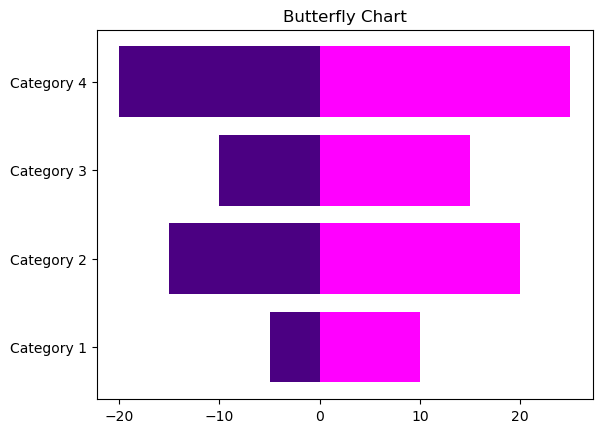

In [15]:
import matplotlib.pyplot as plt

# Sample data
categories_butterfly = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
values_butterfly_pos = [10, 20, 15, 25]  # Positive values
values_butterfly_neg = [-5, -15, -10, -20]  # Negative values

# Create a figure and axis
fig, ax_butterfly = plt.subplots()

# Plot positive values with blue color
ax_butterfly.barh(categories_butterfly, values_butterfly_pos, color='fuchsia')

# Plot negative values with orange color
ax_butterfly.barh(categories_butterfly, values_butterfly_neg, color='indigo')

# Set chart title
ax_butterfly.set_title('Butterfly Chart')

# Show the plot
plt.show()
